# Visualizing Global COVID-19 data


### Data Source: [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19)
#### Fan Wang 
#### March 30

--------------------

In this notebook, we demonstrate the visualization of the Johns Hopkins COVID-19 data currently available in a Gen3 Data Commons.
The results from this notebook are purely for demonstration purposes and should not be interpreted as scientifically rigorous.

## Setup

### Install dependencies

Uncomment the lines for packages you need to install and run the cell.

In [ ]:
#!pip install --force --upgrade gen3 --ignore-installed certifi
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install seaborn

### Load required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gen3
import warnings

from gen3.auth import Gen3Auth
from gen3.submission import Gen3Submission

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="ticks", color_codes=True)
%config InlineBackend.figure_format = 'svg'

## Extract data from the Commons

Using the Gen3 SDK, we can easily extract the `summary_location` and `summary_report` nodes
associated with the Johns Hopkins dataset.

In [18]:
# Set up gen3
api = "https://chicagoland.pandemicresponsecommons.org"
creds = "/home/jovyan/pd/credentials.json"
auth = Gen3Auth(api, creds)
sub = Gen3Submission(api, auth)

# Query parameters
program = "open"
project = "JHU"

# Extract nodes locally
summary_location = sub.export_node(
    program, project, "summary_location", "tsv", "summary_location.tsv"
)
summary_report = sub.export_node(
    program, project, "summary_report", "tsv", "summary_report.tsv"
)


Output written to file: summary_location.tsv

Output written to file: summary_report.tsv


Once the data is downloaded, we can simply load them into two pandas dataframes. To facilitate downstream analysis,
we then merge the datasets into a single dataframe.

In [3]:
# Load data into dataframes
location = pd.read_csv("/home/jovyan/covid19-notebook/summary_location.tsv", sep="\t")
location = location.rename(columns={"submitter_id": "summary_locations.submitter_id"})
report = pd.read_csv("/home/jovyan/covid19-notebook/summary_report.tsv", sep="\t")

# Merge into a single dataframe
data = pd.merge(location, report, on="summary_locations.submitter_id", how="inner")

## Confirmed cases over time

### Extract data for plotting

In [4]:
data1 = data[["country_region", "date", "confirmed"]]
data1["Confirmed"] = data1["confirmed"].replace("None", 0)
data1["Confirmed"] = data1["Confirmed"].astype(int)
data2 = data1[["country_region", "date", "Confirmed"]]
data_day = data2.groupby(["country_region", "date"]).sum()

In [5]:
# Pivot data to wide & index by date
df = data_day.reset_index().pivot(
    index="date", columns="country_region", values="Confirmed"
)
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

### Visualize confirmed cases

These plots contains data from January 22, 2020 and we focus on China, US, Italy, France, and Spain.

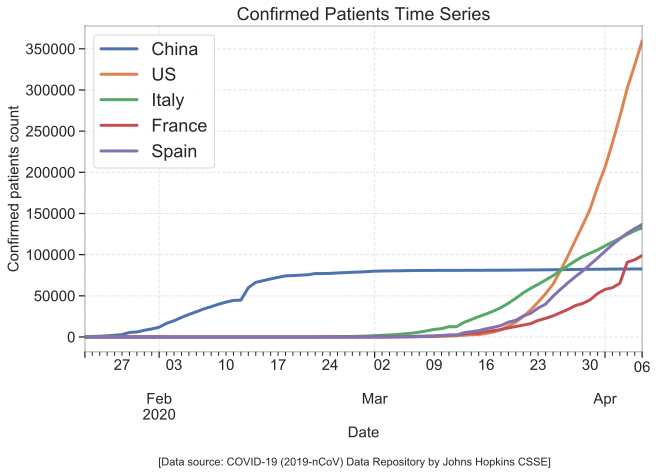

In [6]:
poi = ["China", "US", "Italy", "France", "Spain"]
df[poi].plot(figsize=(10, 6), linewidth=3, fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(loc=2, prop={"size": 18})
plt.ylabel("Confirmed patients count", fontsize=15)
plt.suptitle(
    "[Data source: COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE]",
    fontsize=11,
    y=-0.12,
)
plt.title("Confirmed Patients Time Series", fontsize=18)
plt.grid(linestyle="--", alpha=0.5)
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(0.3)

In logarithmic scale:

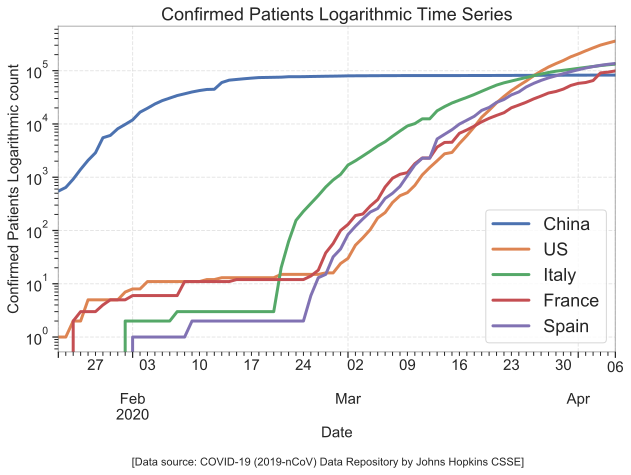

In [7]:
df[poi].plot(figsize=(10, 6), linewidth=3, fontsize=15, logy=True)
plt.xlabel("Date", fontsize=15)
plt.legend(loc=4, prop={"size": 18})
plt.ylabel("Confirmed Patients Logarithmic count", fontsize=15)
plt.suptitle(
    "[Data source: COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE]",
    fontsize=11,
    y=-0.12,
)
plt.title("Confirmed Patients Logarithmic Time Series", fontsize=18)
plt.grid(linestyle="--", alpha=0.5)
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(0.3)

#### Summarization of trends

* US and West European countries have continued increases in the number of confirmed cases.
* US not only has the largest number of confirmed cases in the world, it also has one of the highest rates of coronavirus spread among the selected countries. 
* China has stablized the coronavirus outbreak as the number of new cases has dropped.

## COVID-19 deaths over time

### Extract data for plotting

In [8]:
data1 = data[["country_region", "date", "deaths"]]
data1["Deaths"] = data1["deaths"].replace("None", 0)
data1["Deaths"] = data1["Deaths"].astype(int)
data2 = data1[["country_region", "date", "Deaths"]]
data_day = data2.groupby(["country_region", "date"]).sum()
df = data_day.reset_index().pivot(
    index="date", columns="country_region", values="Deaths"
)
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

### Visualize deaths over time

These plots contains data from January 22, 2020 and we focus on China, US, Italy, France, and Spain.

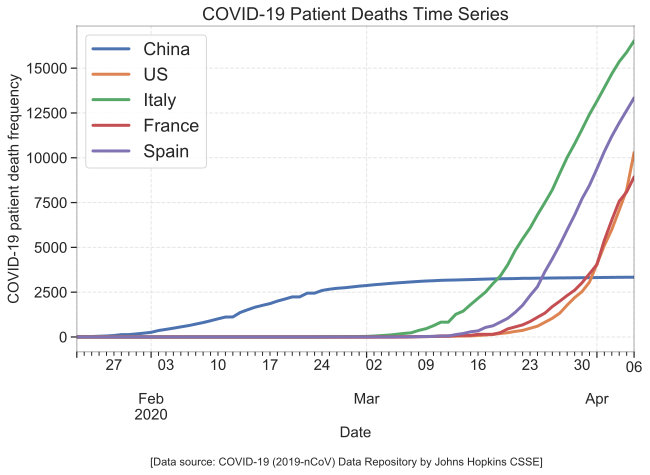

In [9]:
df[poi].plot(figsize=(10, 6), linewidth=3, fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(loc=2, prop={"size": 18})
plt.ylabel("COVID-19 patient death frequency", fontsize=15)
plt.suptitle(
    "[Data source: COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE]",
    fontsize=11,
    y=-0.12,
)
plt.title("COVID-19 Patient Deaths Time Series", fontsize=18)
plt.grid(linestyle="--", alpha=0.5)
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(0.3)

#### Summarization of the trends:

* Italy and Spain have the highest number of COVID-19 deaths (15,887 and 12,641 deaths respectively) as of April 6, 2020. 
* The frequency of deaths in China have started to stabilize.

## Recovered patients over time

### Extract data for plotting

In [10]:
data1 = data[["country_region", "date", "recovered"]]
data1["Recovered"] = data1["recovered"].replace("None", 0)
data1["Recovered"] = data1["Recovered"].astype(int)
data2 = data1[["country_region", "date", "Recovered"]]
data_day = data2.groupby(["country_region", "date"]).sum()
df = data_day.reset_index().pivot(
    index="date", columns="country_region", values="Recovered"
)
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

### Visualize recovered patients over time

These plots contains data from January 22, 2020 and we focus on China, US, Italy, France, and Spain.

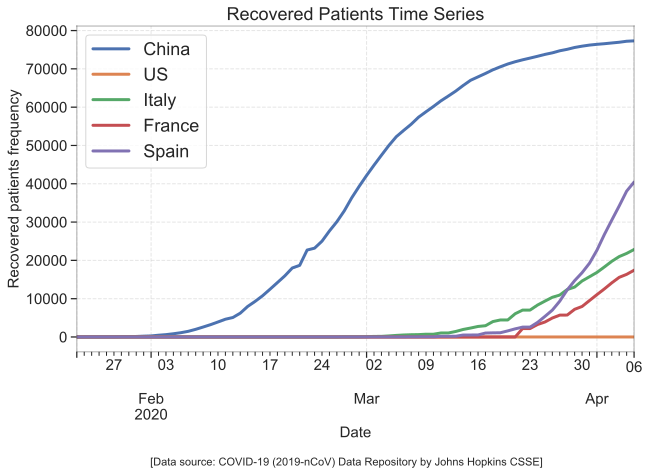

In [11]:
poi = ["China", "US", "Italy", "France", "Spain"]
df[poi].plot(figsize=(10, 6), linewidth=3, fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(loc=2, prop={"size": 18})
plt.ylabel("Recovered patients frequency", fontsize=15)
plt.suptitle(
    "[Data source: COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE]",
    fontsize=11,
    y=-0.12,
)
plt.title("Recovered Patients Time Series", fontsize=18)
plt.grid(linestyle="--", alpha=0.5)
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(0.3)

#### Summarization of the trends:

* Fortunately, most of the confirmed cases tend to recover.

## Conclusion

Here, we demonstrate the ability to visualize relevant longitudinal COVID-19 data within a Gen3 data commons.